In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img=cv2.imread("data.jpg",0)

In [3]:
def shadow_remove(img):
    rgb_planes = cv2.split(img)
    result_planes = []
    result_norm_planes = []
    for plane in rgb_planes:
        dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
        bg_img = cv2.medianBlur(dilated_img, 21)
        diff_img = 255 - cv2.absdiff(plane, bg_img)
        norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
        result_planes.append(diff_img)
        result_norm_planes.append(norm_img)
    result = cv2.merge(result_planes)
    result_norm = cv2.merge(result_norm_planes)
    return result_norm

In [4]:
img=shadow_remove(img)

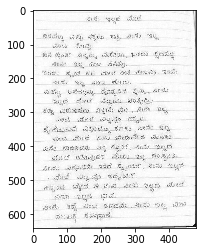

In [5]:
plt.imshow(img,cmap='gray')

In [6]:
print(img)

[[250 251 254 ... 142 236 252]
 [252 254 255 ... 142 236 252]
 [252 254 255 ... 142 238 252]
 ...
 [254 254 254 ...  44 201 255]
 [254 254 254 ... 255 252 240]
 [254 254 254 ... 255 235 255]]


In [7]:
img.shape

(640, 480)

In [17]:
#blurred = cv2.GaussianBlur(img, (3, 3), 0)
blurred = cv2.medianBlur(img,3)

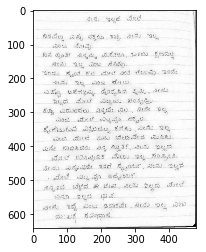

In [18]:
plt.imshow(blurred,cmap='gray')

In [19]:
mean_pixelval=np.mean(np.reshape(blurred,blurred.shape[0]*blurred.shape[1]))

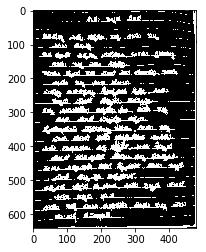

In [20]:
ret,thresh1 = cv2.threshold(blurred,mean_pixelval,255,cv2.THRESH_BINARY_INV)
kernel = np.ones((1, 1), np.uint8)
plt.imshow(thresh1,cmap='gray')
# thresh1 = cv2.dilate(thresh1, kernel, iterations=1)
# opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
# plt.imshow(thresh1)
#thresh1 = cv2.erode(thresh1,kernel,iterations = 1)
#plt.imshow(opening)

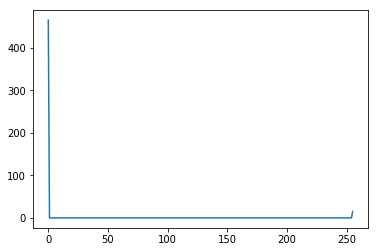

In [21]:
histr = cv2.calcHist([thresh1[10]],[0],None,[256],[0,256])
plt.plot(histr)
plt.show()

In [34]:
whites=[]
blacks=[]
variance=[]
for i in range(thresh1.shape[0]):
    black=np.unique(thresh1[i],return_counts=True)[1][0]
    white=img.shape[1]-black
    whites.append(white)
    blacks.append(black)
    variance.append(np.var(thresh1[i]))
#print(whites)
#print(len(whites))
#print(blacks)
#print(variance)
npvar=np.array(variance)
meanvar=npvar.mean()

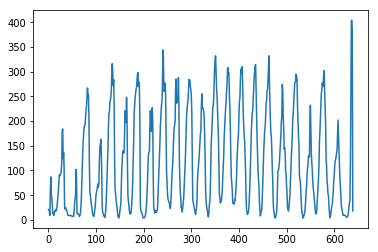

In [23]:
plt.plot(whites)
plt.show()

In [26]:
linelist=[]
for i in range(len(blacks)):
    if blacks[i]>(thresh1.shape[1]-10) or variance[i]<meanvar:
        linelist.append(i)

In [31]:
len(linelist)

306

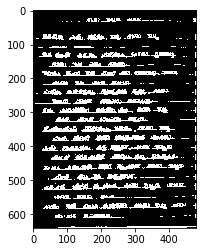

In [29]:
temp=thresh1.copy()
for i in linelist:
    temp[i]=0
plt.imshow(temp,cmap='gray'
          )

In [30]:
for i in range(img.shape[0]):
    if np.any(temp[i])==0:
        print(i)

0
1
2
3
4
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
59
60
61
62
63
64
65
66
67
68
69
70
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
113
114
115
116
117
118
119
120
121
122
140
141
142
143
144
145
146
147
148
149
150
151
152
153
167
168
169
170
171
172
173
174
175
176
177
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
221
222
223
224
225
226
227
228
229
230
231
249
250
251
252
253
254
255
256
257
258
259
276
277
278
279
280
281
282
283
284
285
303
304
305
306
307
308
309
310
311
312
313
330
331
332
333
334
335
336
337
338
339
340
359
360
361
362
363
364
365
385
386
387
388
389
390
391
392
393
394
415
416
417
418
419
420
421
422
423
441
442
443
444
445
446
447
448
449
450
471
472
473
474
475
476
477
478
479
480
481
500
501
502
503
504
505
506
507
508
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
555
556
557
558
559
560
561
562
563
564
565
566
585
586
587
588


In [99]:
def printwords(mask,img,a,b):
    temp=mask.copy()[a:b]
    print("The sentence: ")
    plt.imshow(img[a:b],cmap='gray')
    plt.show()
    #print(np.unique(mask,return_counts=True))
    blacks=[]
    whites=[]
    variance=[]
    for i in range(temp.shape[1]):
        black=np.unique(temp[:,i],return_counts=True)[1][0]
        white=temp.shape[0]-black
        whites.append(white)
        blacks.append(black)
        variance.append(np.var(temp[:,i]))
    npvar=np.array(variance)
    meanvar=npvar.mean()
    linelist=[]
    for i in range(len(blacks)):
        if variance[i]<meanvar:
            linelist.append(i)
    for i in linelist:
        temp[:,i]=0
    ranges=[]
    for i in range(len(linelist)-1):
        if linelist[i+1]!=linelist[i]+1:
            if(linelist[i+1]-linelist[i]>10):
                ranges.append((linelist[i],linelist[i+1]))
                #print(linelist[i],linelist[i+1])
                #plt.imshow(img[a:b,linelist[i]:linelist[i+1]],cmap='gray')
                #plt.show()
    finranges=[]
    m=0
    for i in range(len(ranges)-1):
        if m==1:
            m=0
            continue
        if(ranges[i+1][0]-ranges[i][1]<=5):
            finranges.append((ranges[i][0],ranges[i+1][1]))
            m=1
        else:
            finranges.append(ranges[i])
    finranges.append(ranges[-1])
    for i in finranges:
        plt.imshow(img[a:b,i[0]:i[1]],cmap='gray')
        plt.show()
    start=0
    kernel = np.ones((2,1),np.uint8)
    for i in range(temp.shape[1]):
        if temp[:,i].any()!=0:
            if i-start>10:
                #dilation = cv2.dilate(temp[start:i],kernel,iterations = 1)
                #plt.imshow(dilation,cmap='gray')
                #plt.imshow(img[a:b,start-5:i+5],cmap='gray')
                #plt.show()
                pass
            start=i

The sentence: 


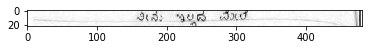

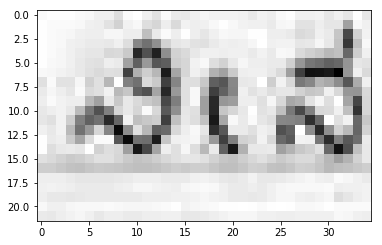

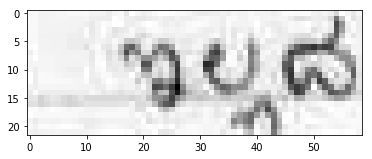

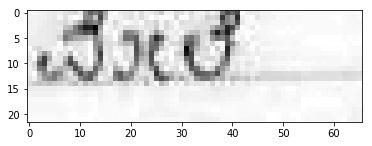

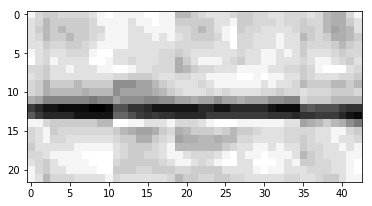

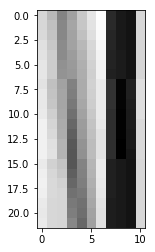

The sentence: 


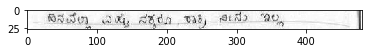

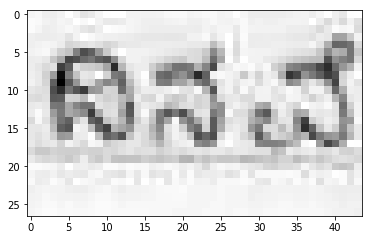

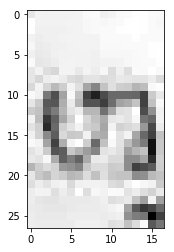

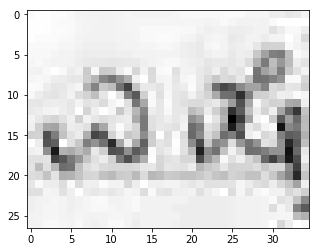

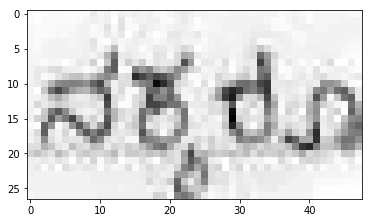

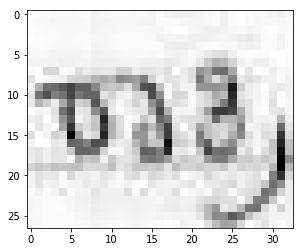

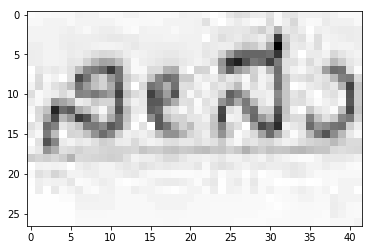

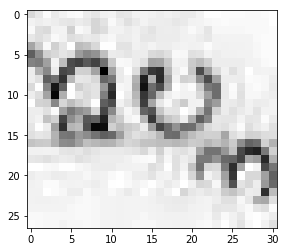

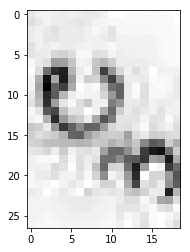

The sentence: 


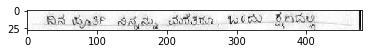

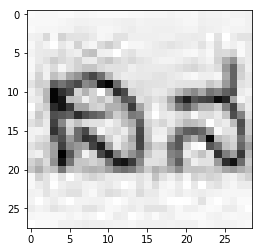

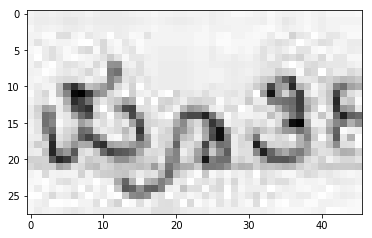

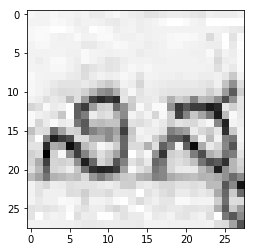

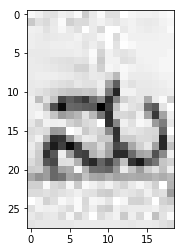

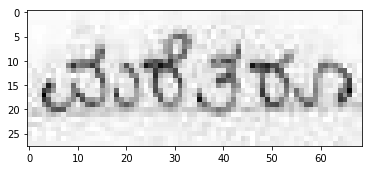

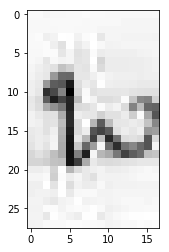

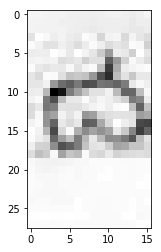

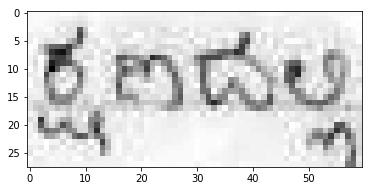

The sentence: 


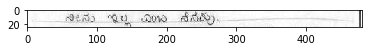

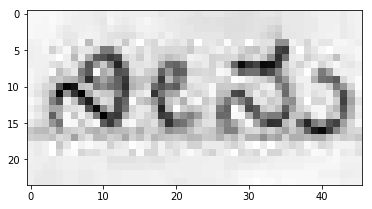

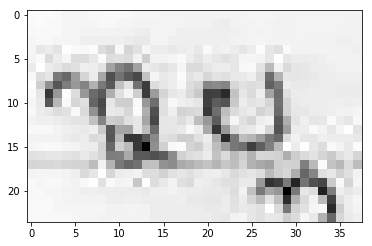

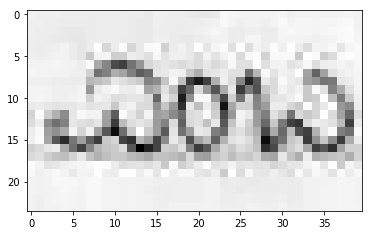

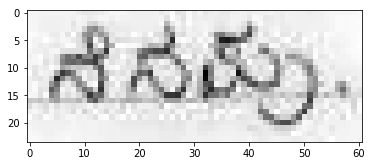

The sentence: 


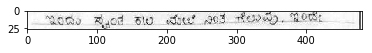

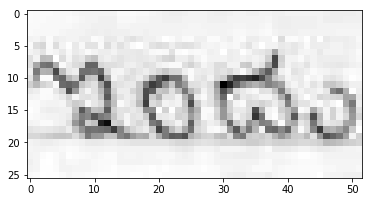

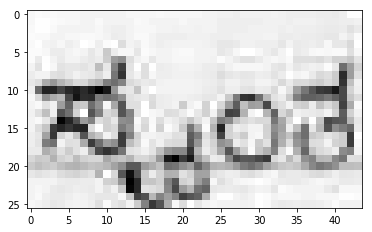

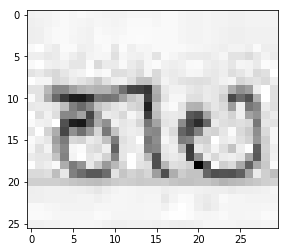

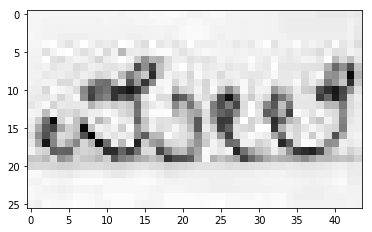

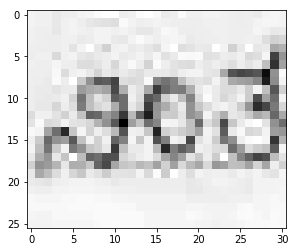

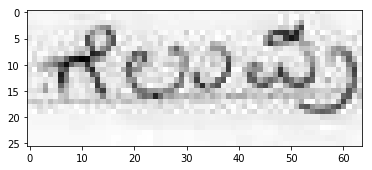

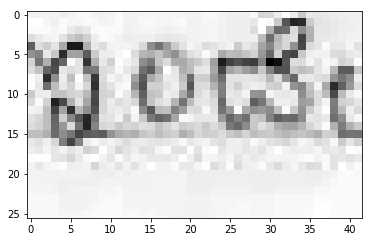

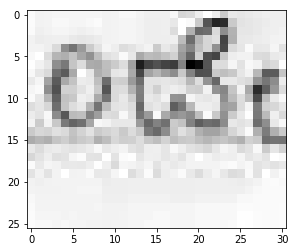

The sentence: 


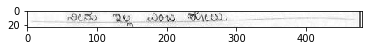

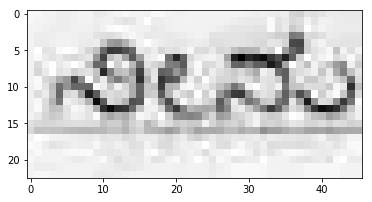

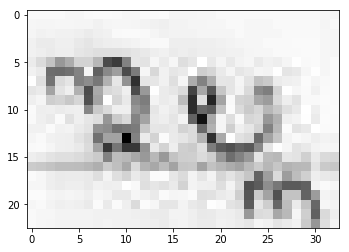

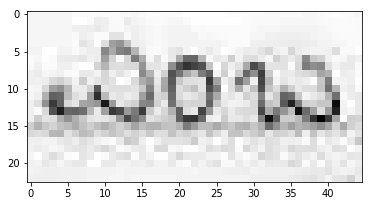

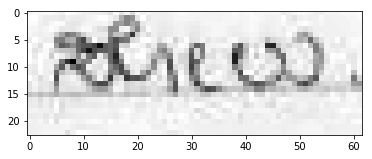

The sentence: 


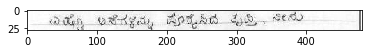

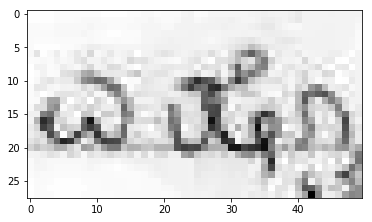

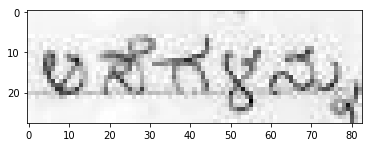

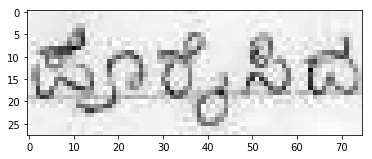

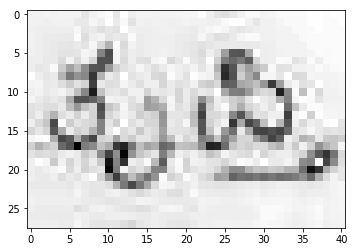

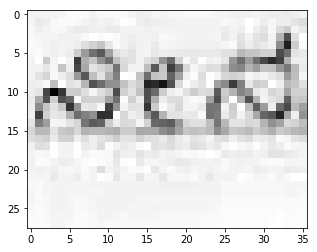

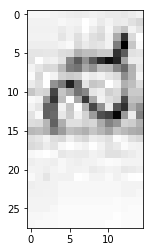

The sentence: 


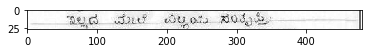

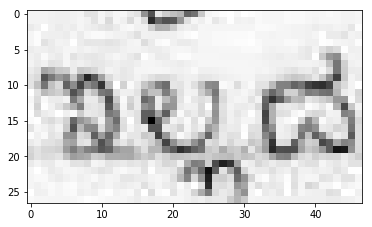

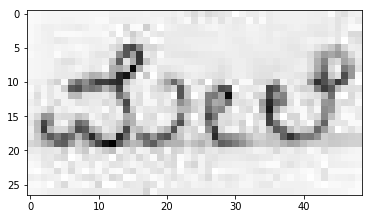

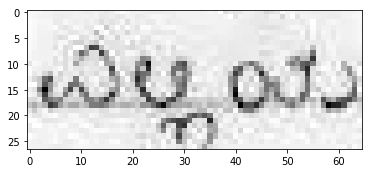

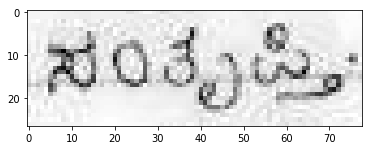

The sentence: 


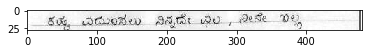

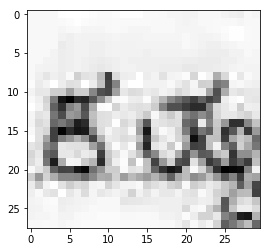

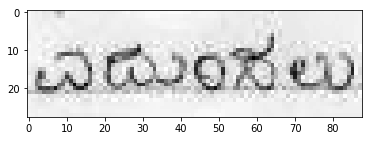

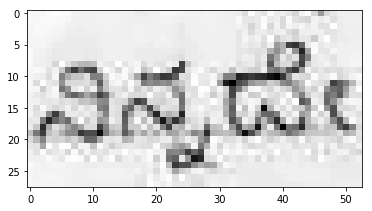

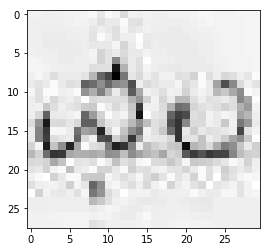

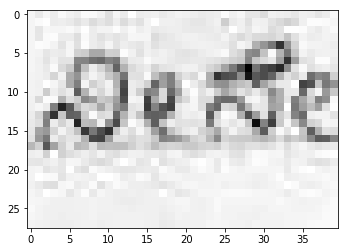

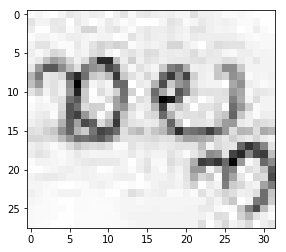

The sentence: 


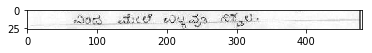

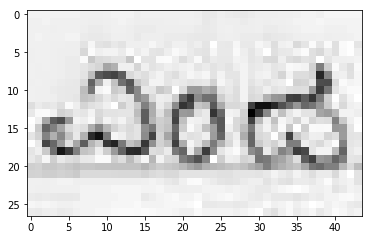

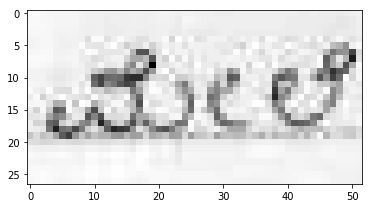

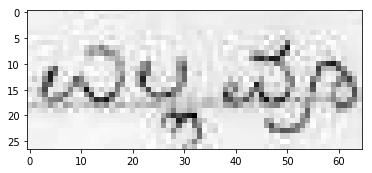

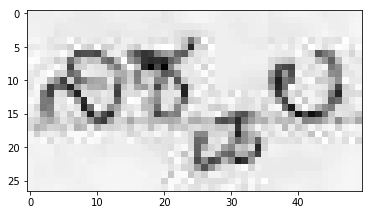

The sentence: 


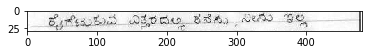

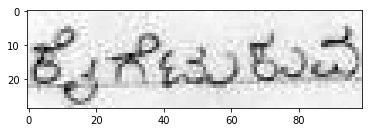

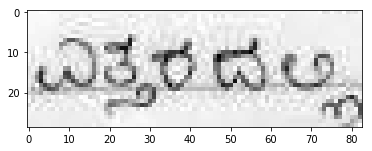

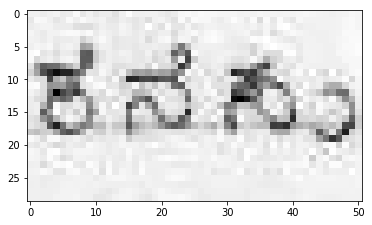

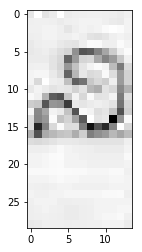

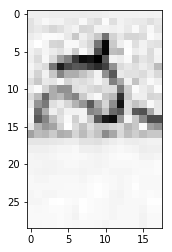

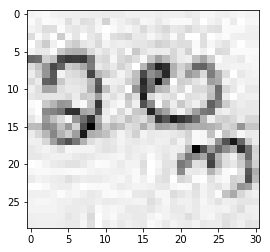

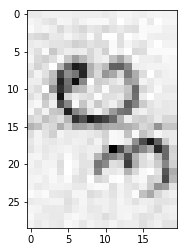

The sentence: 


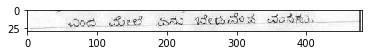

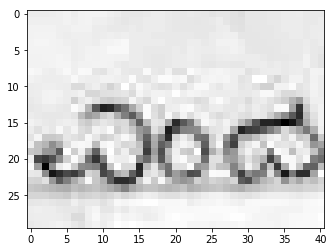

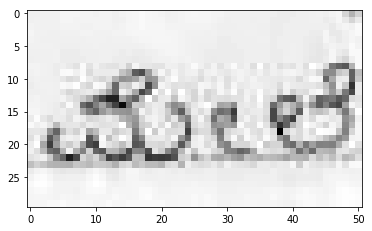

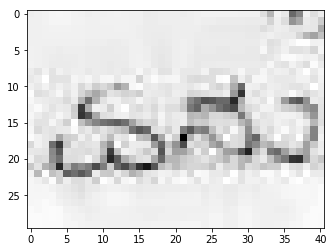

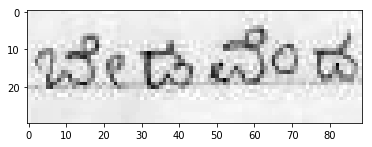

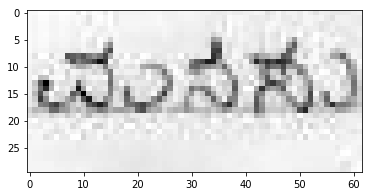

The sentence: 


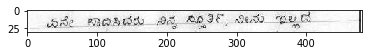

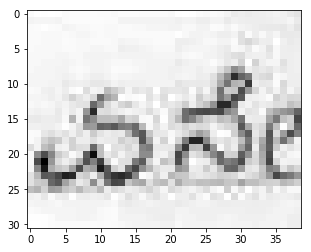

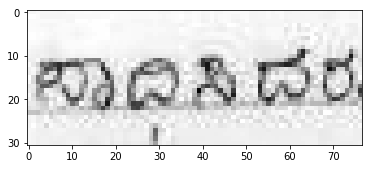

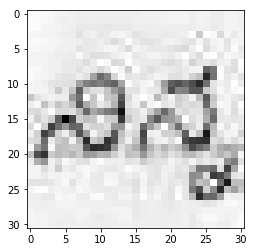

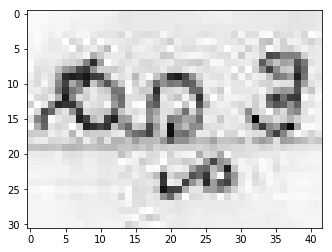

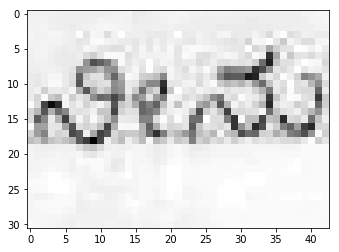

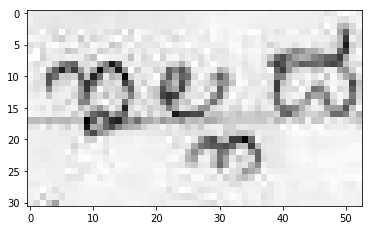

The sentence: 


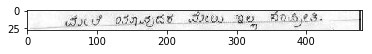

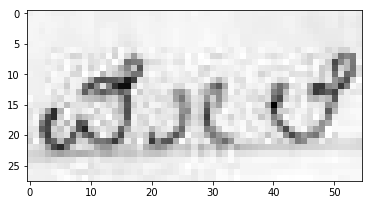

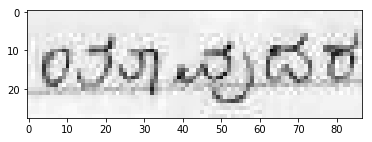

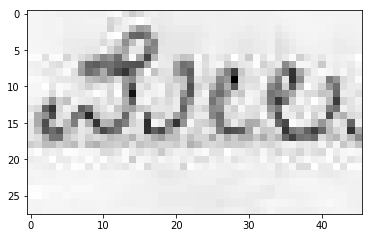

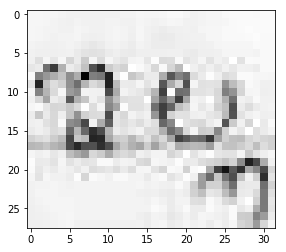

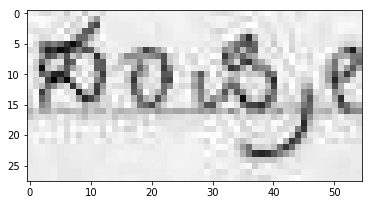

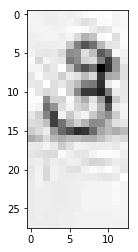

The sentence: 


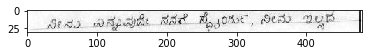

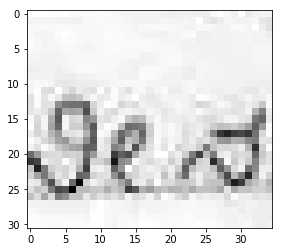

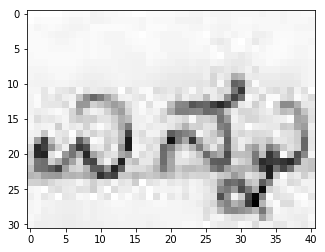

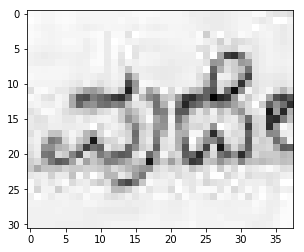

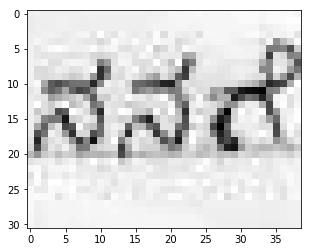

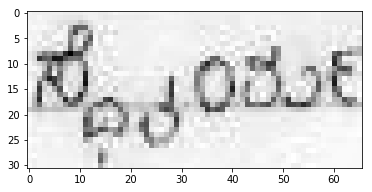

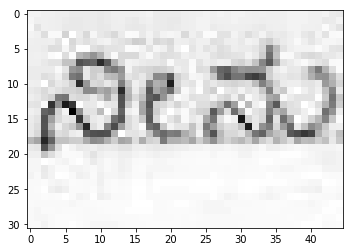

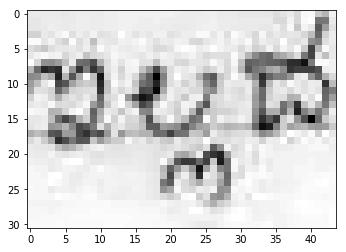

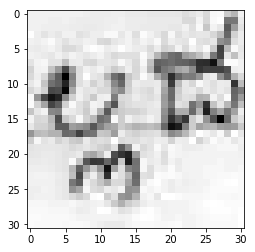

The sentence: 


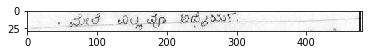

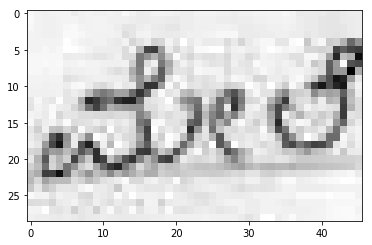

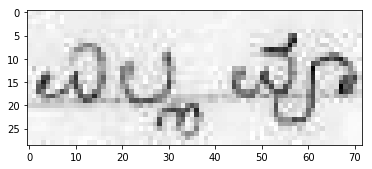

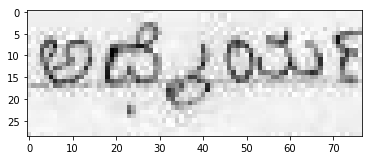

The sentence: 


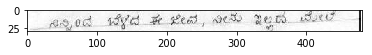

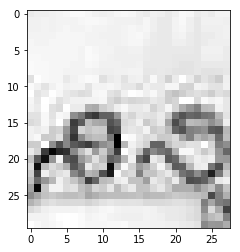

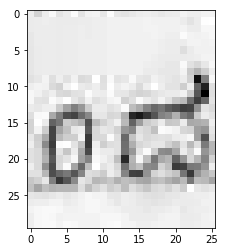

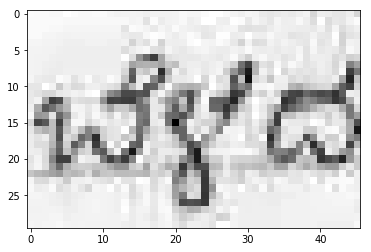

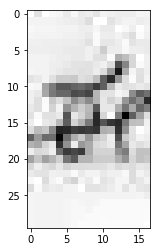

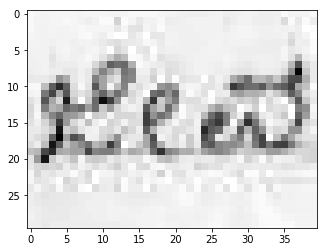

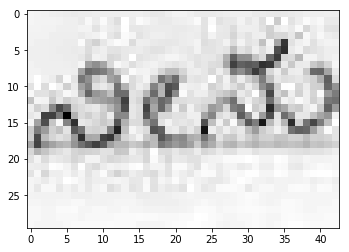

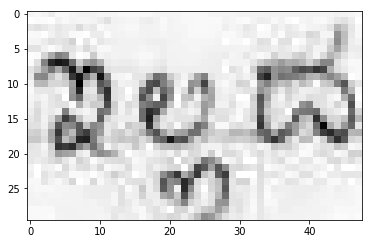

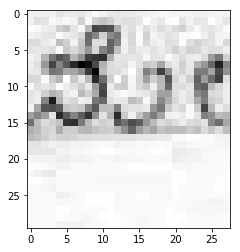

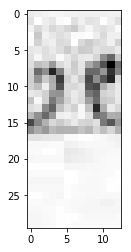

The sentence: 


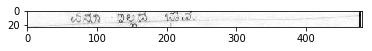

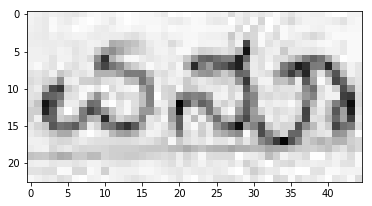

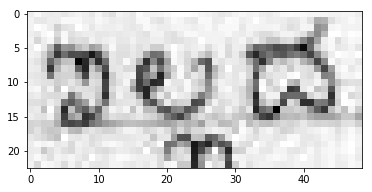

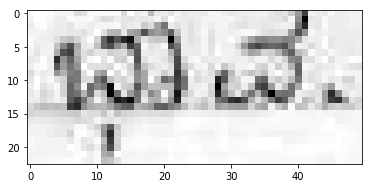

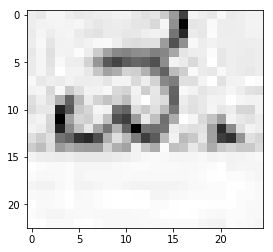

The sentence: 


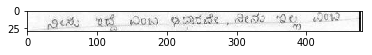

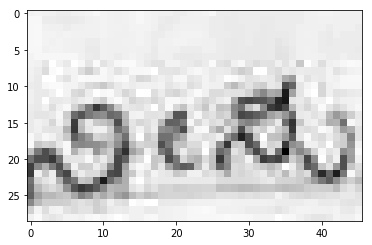

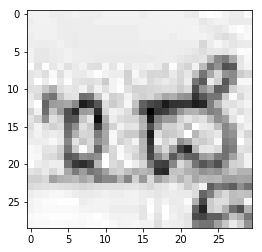

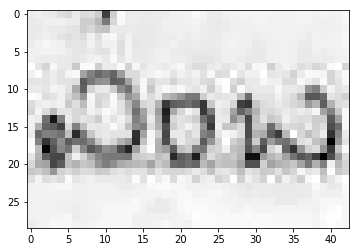

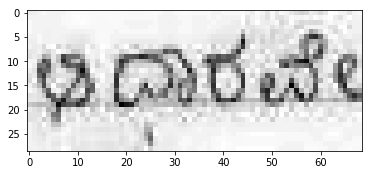

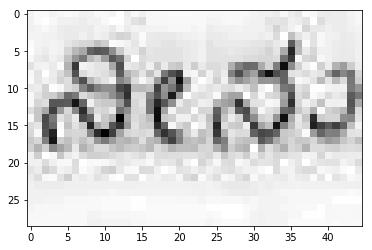

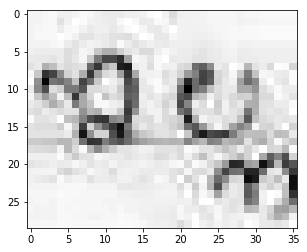

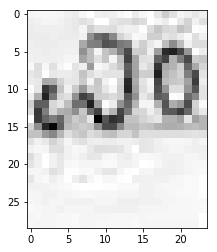

The sentence: 


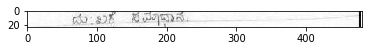

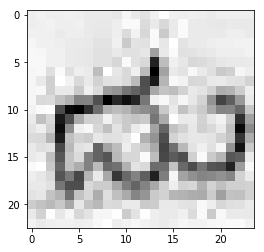

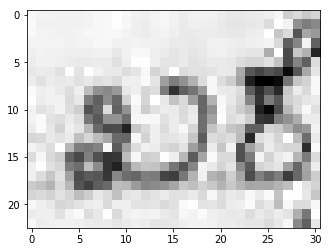

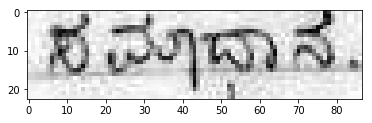

In [100]:
start=0
kernel = np.ones((2,1),np.uint8)
for i in range(temp.shape[0]):
    if temp[i].any()==0:
        if i-start>10:
            #dilation = cv2.dilate(temp[start:i],kernel,iterations = 1)
            #plt.imshow(dilation,cmap='gray')
            printwords(temp,img,start-5,i+5)
            #plt.imshow(img[start-5:i+5],cmap='gray')
            #plt.show()
        start=i

        